In [1]:
import numpy as np
import math

In [2]:
print np.random.normal()

-1.19683037469


### Let's aim for fitting a linear regression model where data comes from line with slope = 3 and intercept = 5, with some Gaussian noise added. 

In [3]:
x_train = [i for i in range(100)]
y_train = [5+3*i+10*np.random.normal() for i in range(100)]

In [4]:
import matplotlib.pyplot as plt

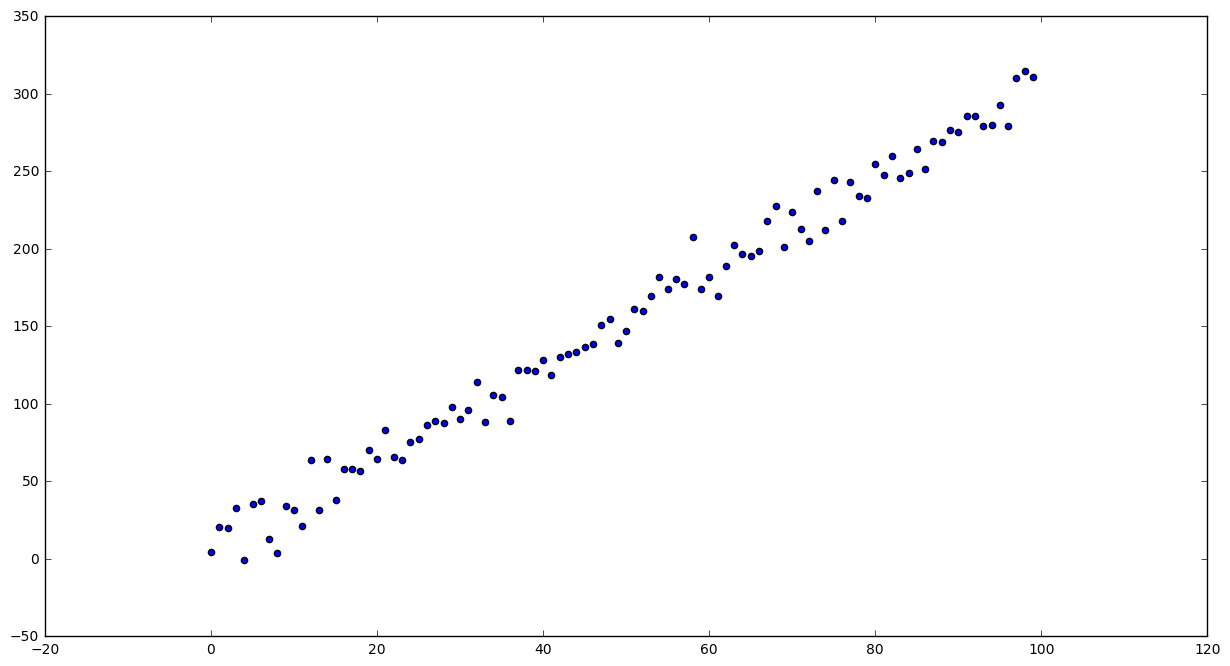

In [5]:
plt.figure(figsize=(15,8))
plt.scatter(x_train,y_train)
plt.show()

In [6]:
a = np.array([1,2,3])
a**2

array([1, 4, 9])

In [7]:
b = np.array([2,3,4])
np.dot(a,b)

20

### Use of Gradient descent and display of the estimated line correcting itself after some iterations 

Initial Theta:  [-0.41755146 -0.82829979]


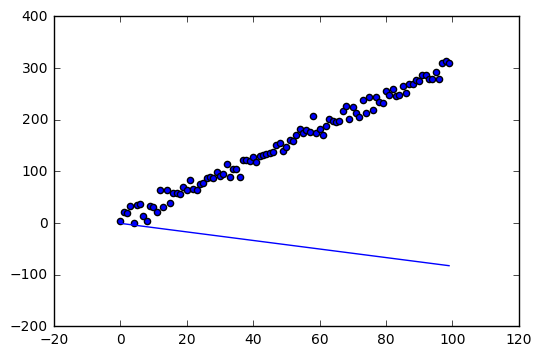

MSE:  252486.685576


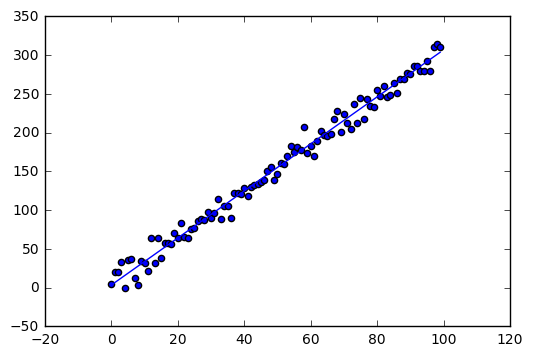

MSE:  531.701196917


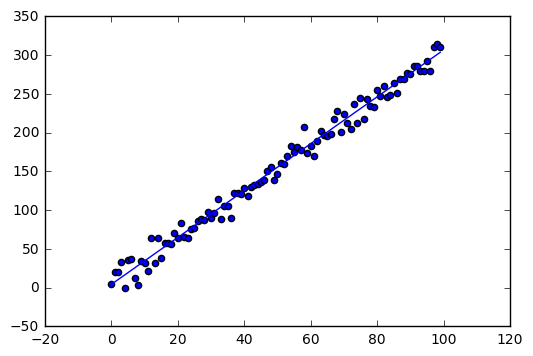

MSE:  529.897731374


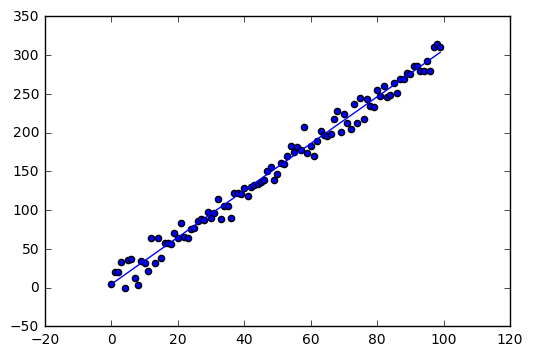

MSE:  529.763195129


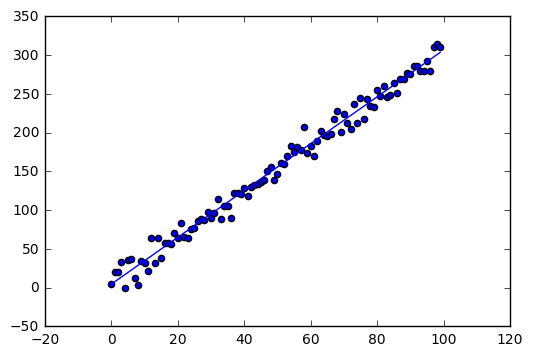

MSE:  529.75116854


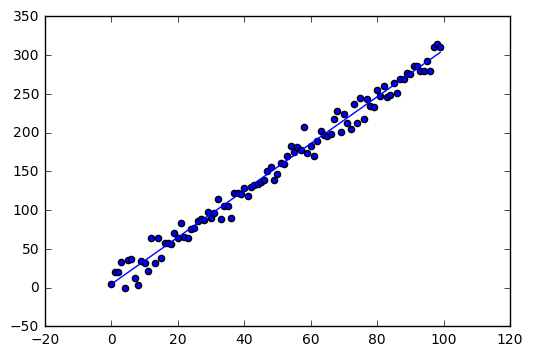

MSE:  529.749612868


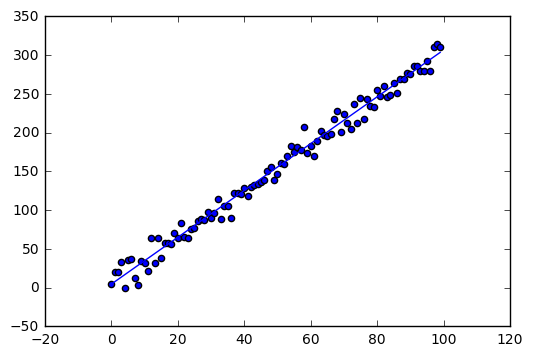

MSE:  529.749314804


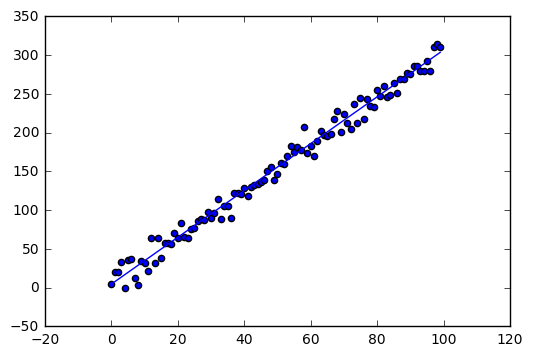

MSE:  529.749244211


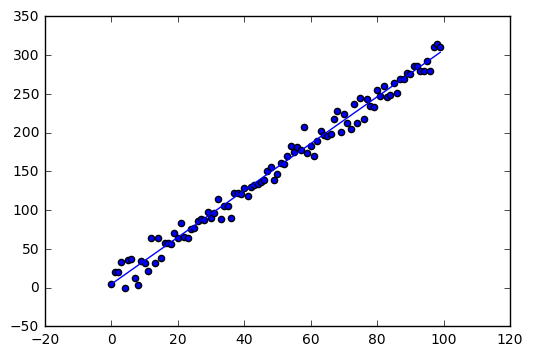

MSE:  529.749226224


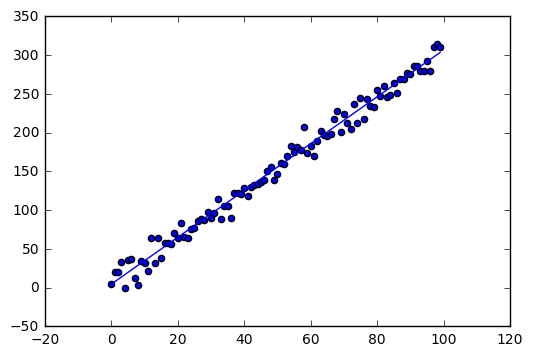

MSE:  529.749221545


In [148]:
theta = np.array([np.random.normal(),np.random.normal()])
print "Initial Theta: ",theta
epoch = 10000
eta = 0.0001
batch = 20
count = 0
costs = []

for i in range(epoch):
    y_calc = map(lambda x: theta[0] + theta[1]*x,x_train)
    if i%1000 == 0:
        plt.hold(True)
        plt.subplot2grid((1, 1), (0, 0))
        #plt.axis([0,50,0,100])
        plt.plot(x_train, y_calc)
        plt.scatter(x_train,y_train)
        plt.show()
        mse = (1.0/batch) * sum((np.array(y_calc)-np.array(y_train))**2)
        print "MSE: ",mse
        
    for j in range(0,100,batch):
        count += 1
        delta_error0 = 0
        delta_error1 = 0
        for k in range(j,j + batch):
            delta_error0 += (np.dot(theta,[1,x_train[k]]) - y_train[k])
            delta_error1 += (x_train[k] * (np.dot(theta,[1,x_train[k]]) - y_train[k]))
        theta = theta - (eta/batch) * np.array([10*delta_error0, delta_error1])
        costs.append(mse)

In [149]:
theta

array([ 4.62230967,  3.02011313])

In [150]:
print y_calc[0], y_train[0]

4.62230966473 4.45469794555


In [151]:
def calc_J(theta0, theta1, x, y):
    val = 0
    for index,i in enumerate(x):
        val += (theta0 + theta1*i - y[index])**2
    val = 0.5 * val/float(len(x))
    #print val
    return val

In [152]:
'''x = np.arange(-10,10,1)
y = np.arange(-10,10,1)

points = []
for i in x:
    for j in y:
        points.append([i,j])

X, Y = zip(*points)'''

'x = np.arange(-10,10,1)\ny = np.arange(-10,10,1)\n\npoints = []\nfor i in x:\n    for j in y:\n        points.append([i,j])\n\nX, Y = zip(*points)'

### Visualization of the loss function given a bunch of (theta0, theta1)'s, i.e. given some slopes and intercepts

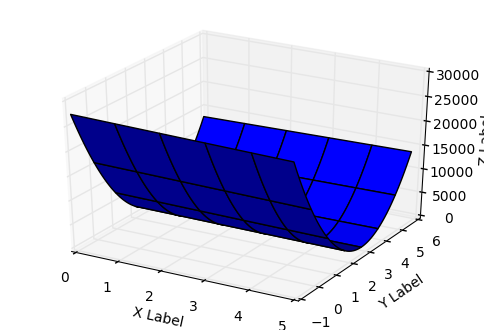

In [153]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = np.arange(0,5,0.1)
Y = np.arange(-1,6,0.1)
X, Y = np.meshgrid(X, Y)

Z = np.array([i for i in X])
Z.reshape(X.shape)

for iindex,i in enumerate(X):
    for jindex, j in enumerate(i):
        val = calc_J(j,Y[iindex][jindex],x_train,y_train)
        Z[iindex][jindex] = val

ax.plot_surface(X, Y, Z)
#print Z
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

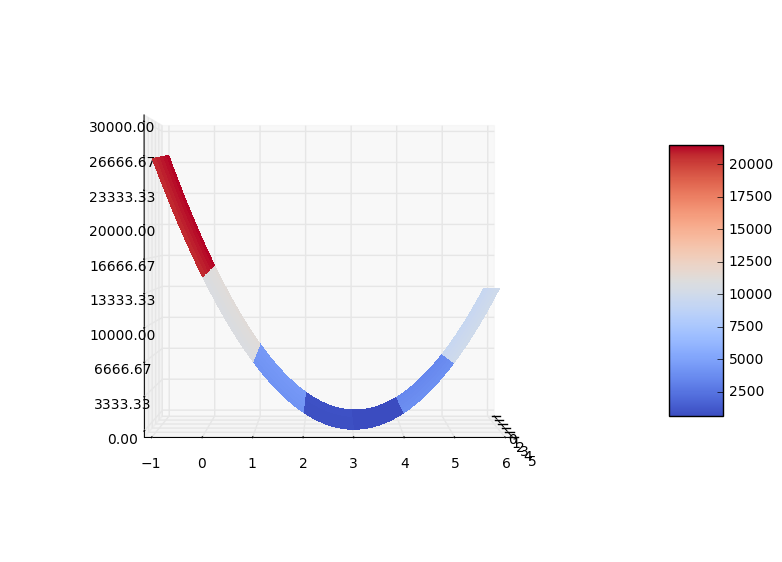

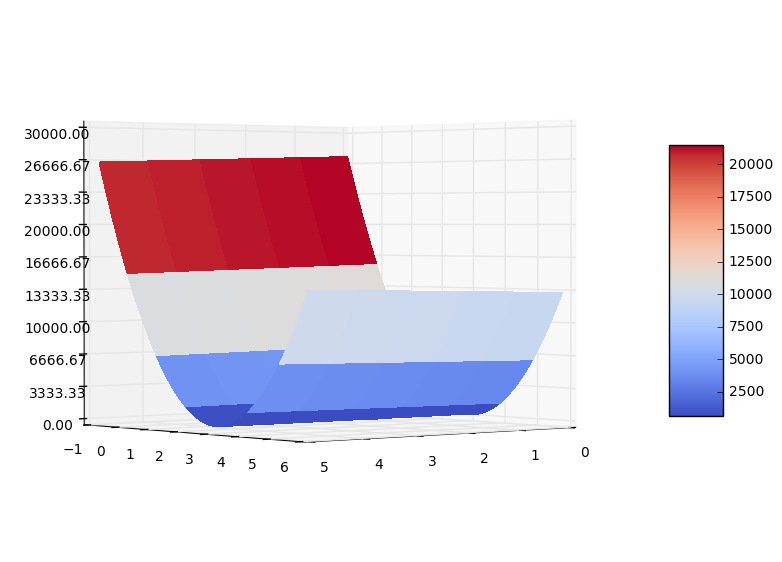

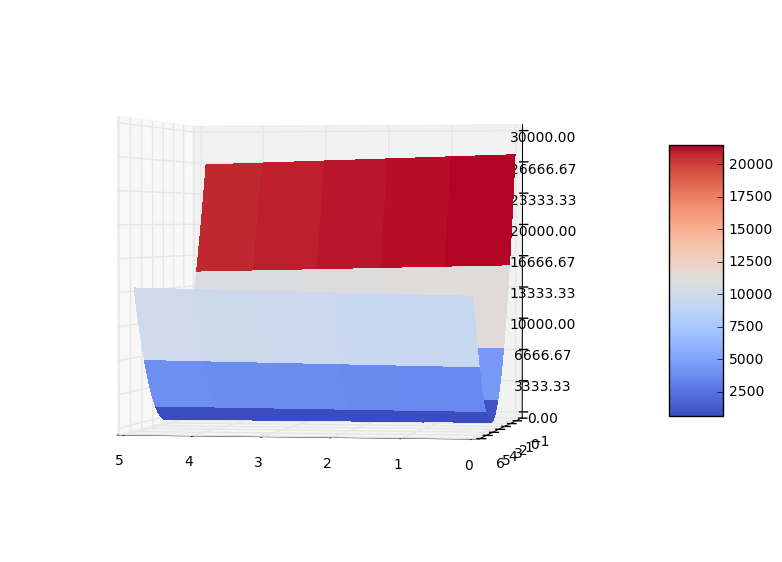

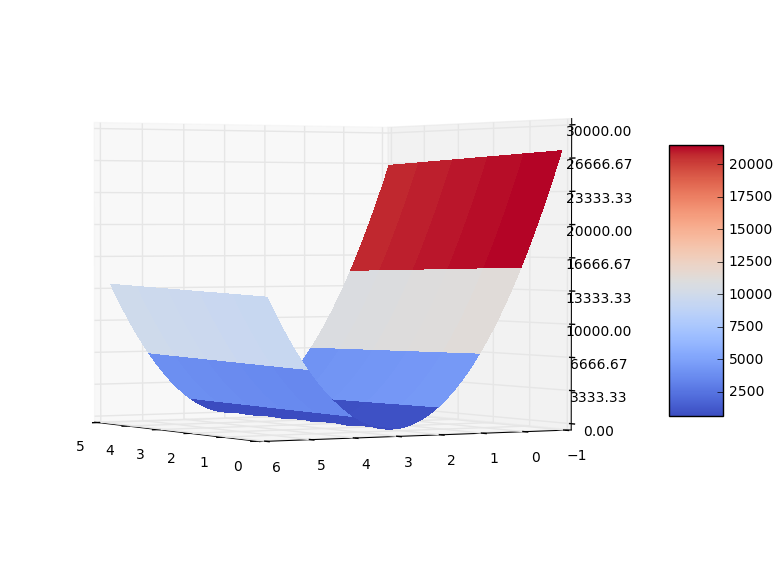

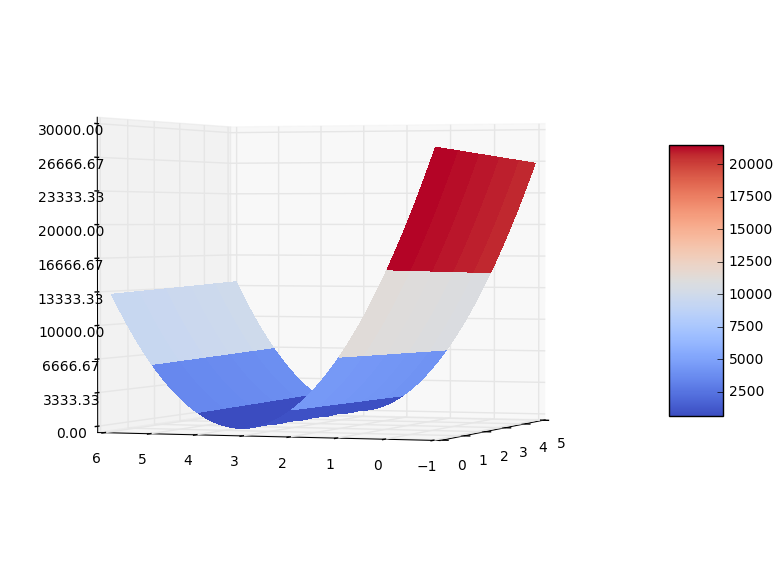

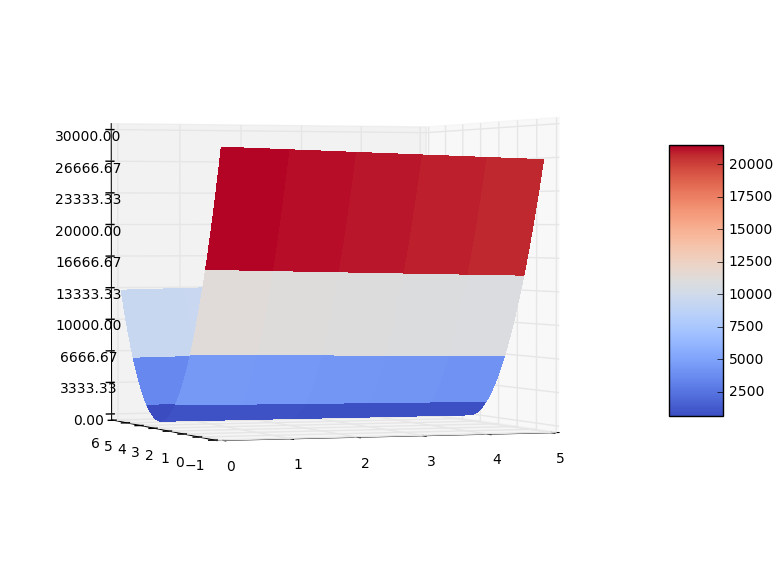

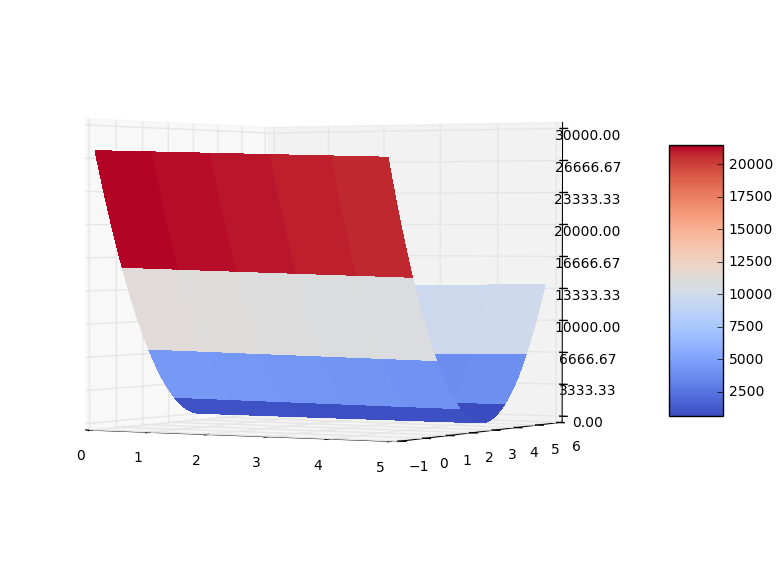

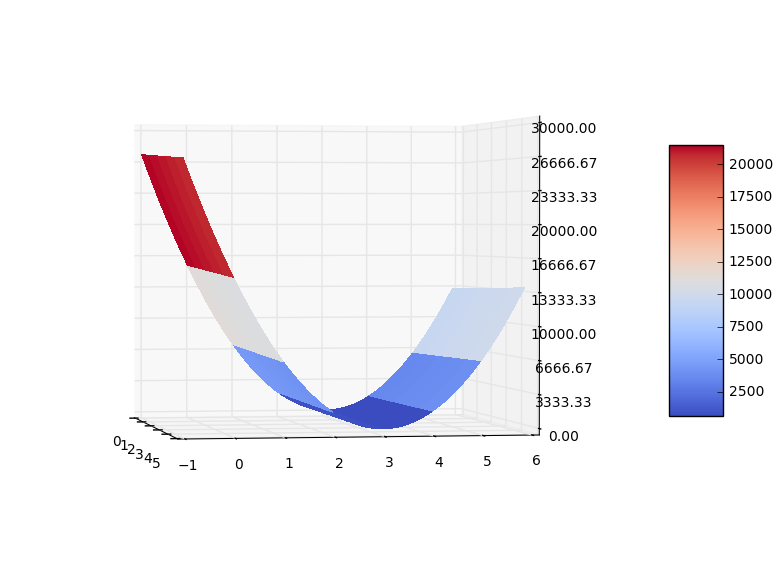

In [154]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter




for angle in range(0, 360, 50):
    fig = plt.figure(figsize=[10,7])
    ax = fig.gca(projection='3d')

# Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.view_init(1, angle)
    plt.draw()
    plt.pause(.1)
    plt.show()